## EDA

In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/Ryan Ler/Downloads/APU/AML/Assignment/loan_data.csv')
data.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

Handling Missing Values

In [2]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [3]:
100 * data.isnull().sum() / len(data)

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
person_emp_exp                    0.0
person_home_ownership             0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

Handling Values of Zero

In [4]:
num = 0
for i in data.columns:
   num += data[i][data[i]==0].count()
num

np.int64(44593)

In [5]:
data.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [6]:
data.shape

(45000, 14)

Descriptive Analysis - Numerical Columns

In [7]:
data.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

Descriptive Analysis - Categorical Columns

In [8]:
data['person_gender'].describe()

count     45000
unique        2
top        male
freq      24841
Name: person_gender, dtype: object

In [9]:
data['person_education'].describe()

count        45000
unique           5
top       Bachelor
freq         13399
Name: person_education, dtype: object

In [10]:
data['person_home_ownership'].describe()

count     45000
unique        4
top        RENT
freq      23443
Name: person_home_ownership, dtype: object

In [11]:
data['loan_intent'].describe()

count         45000
unique            6
top       EDUCATION
freq           9153
Name: loan_intent, dtype: object

In [12]:
data['previous_loan_defaults_on_file'].describe()

count     45000
unique        2
top         Yes
freq      22858
Name: previous_loan_defaults_on_file, dtype: object

Data Visualization

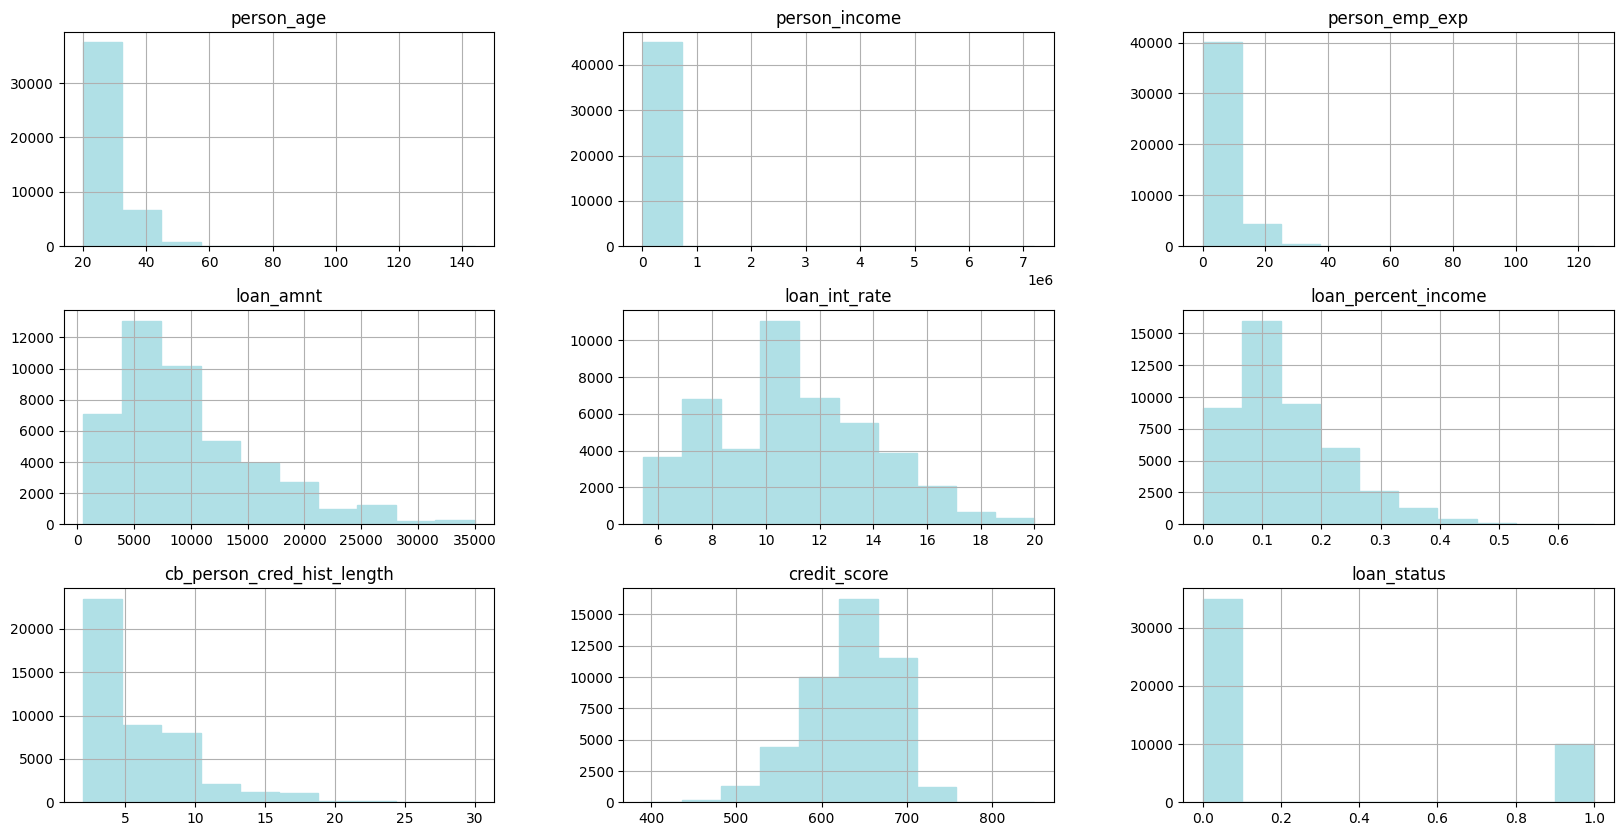

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

data.hist(figsize=(20,10), edgecolor="powderblue", color="powderblue")
plt.show()

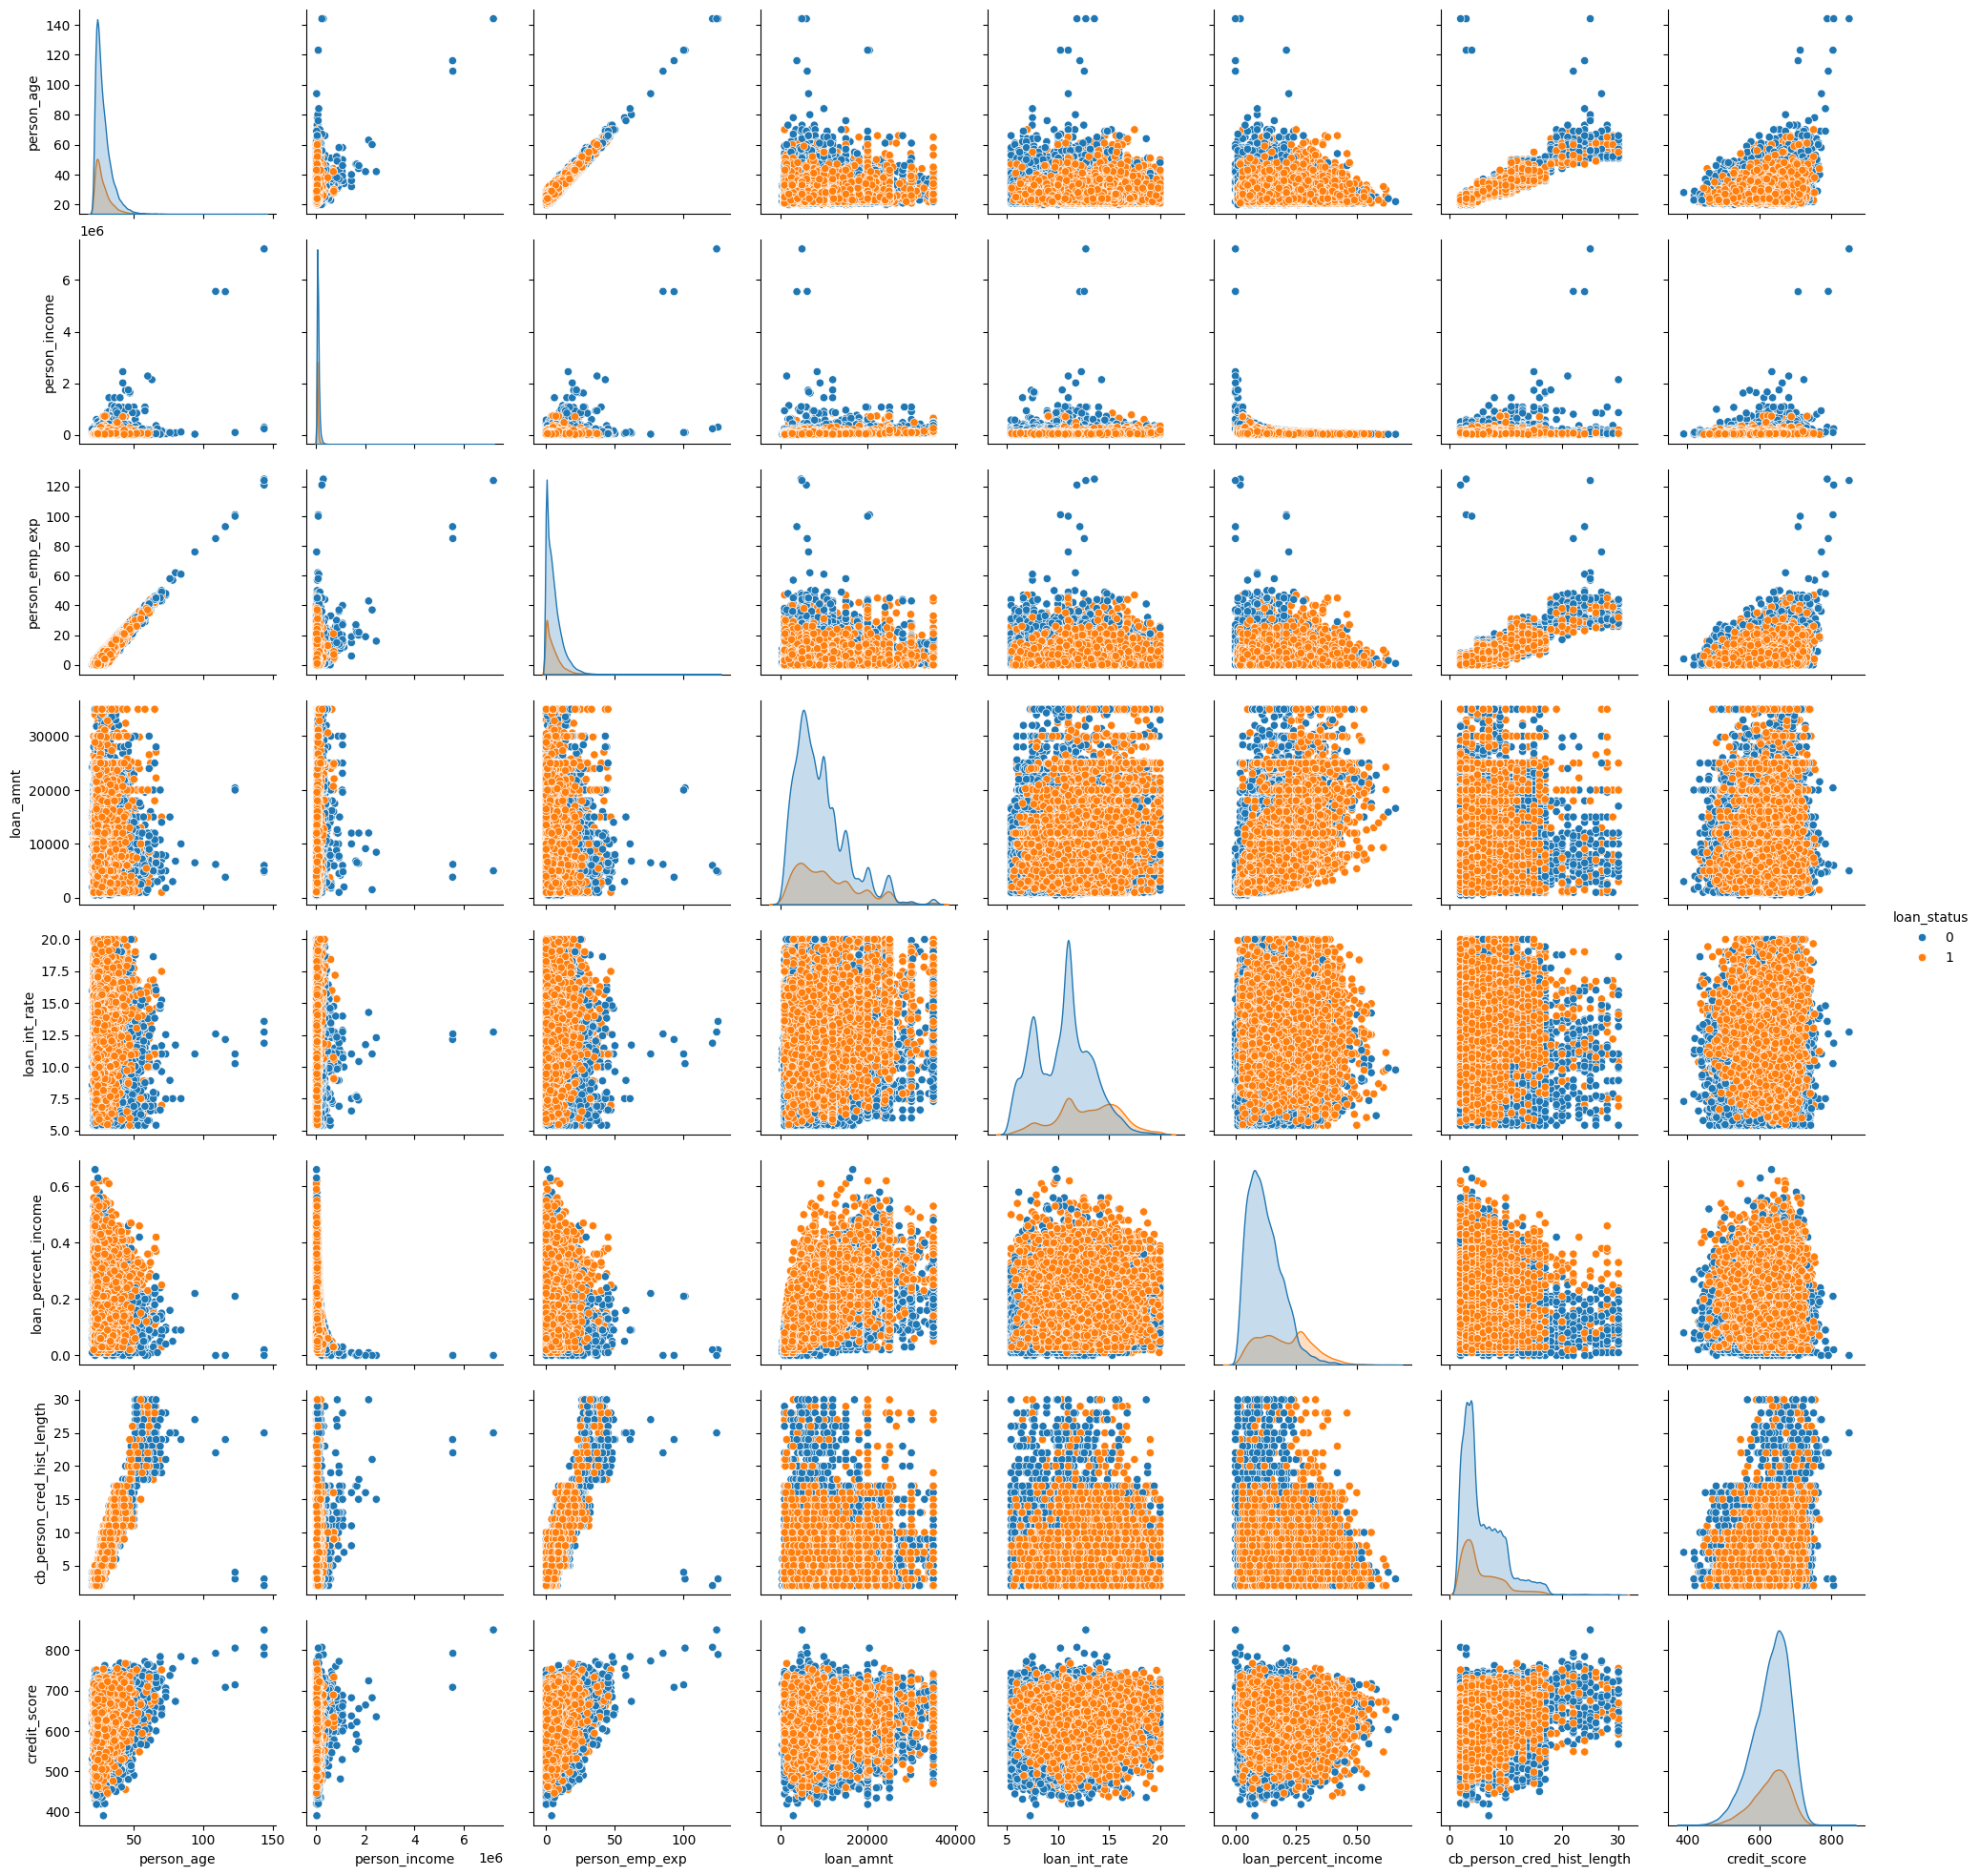

In [14]:
sns.pairplot(data, diag_kind="kde", hue="loan_status")
plt.show()


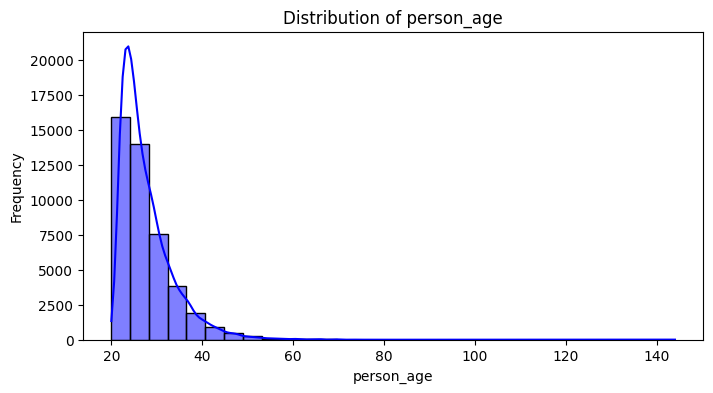

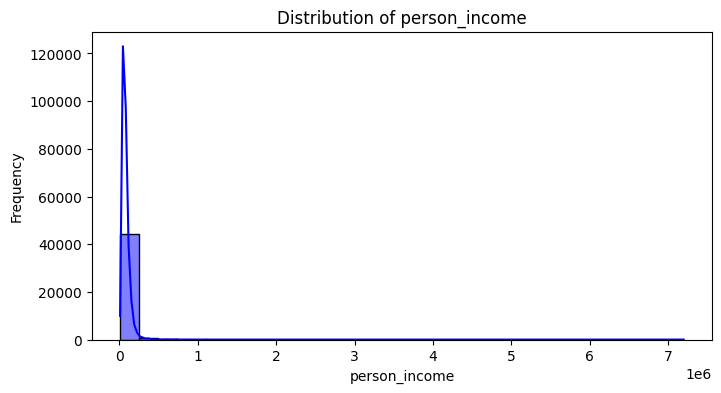

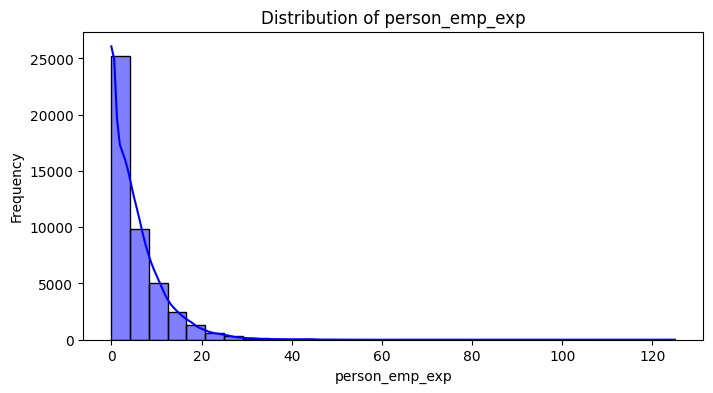

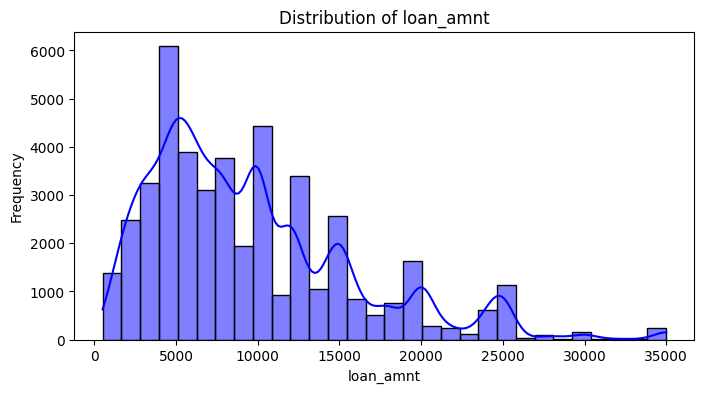

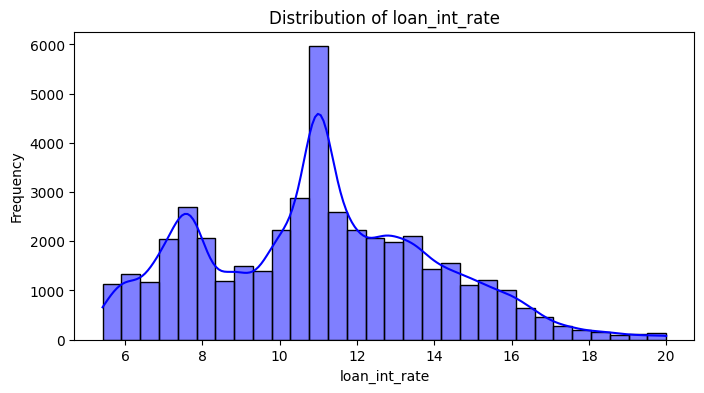

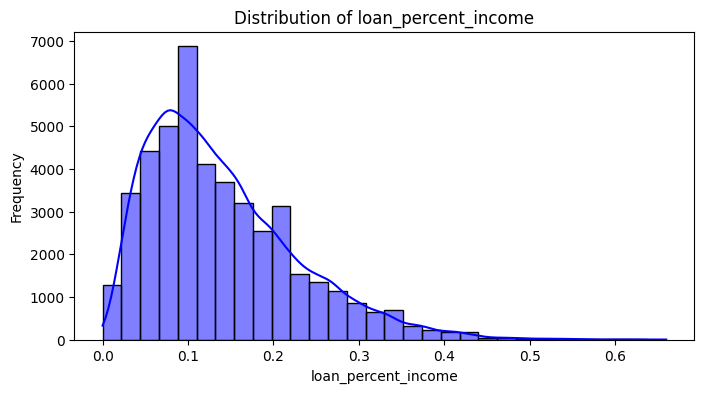

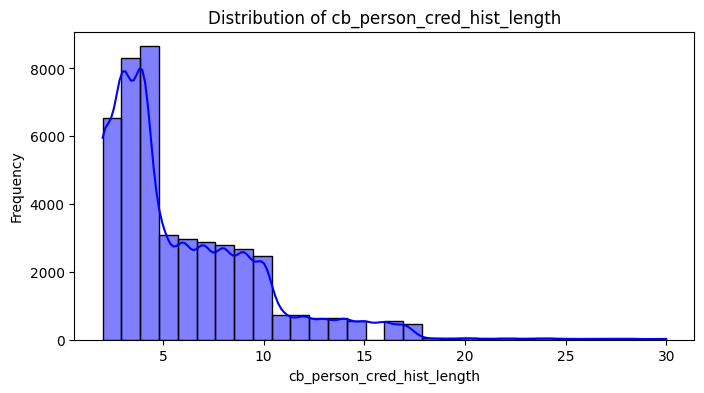

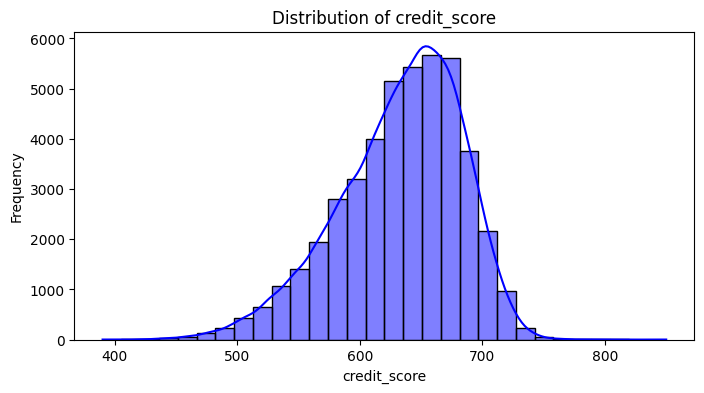

In [15]:
numerical_columns = ['person_age', 'person_income', 'person_emp_exp', 
                     'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                     'cb_person_cred_hist_length', 'credit_score']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


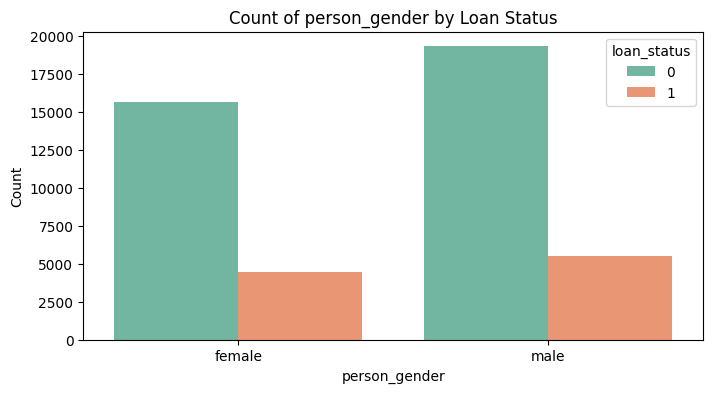

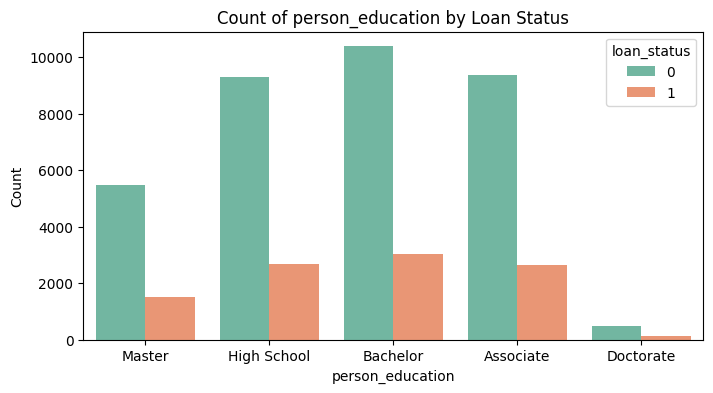

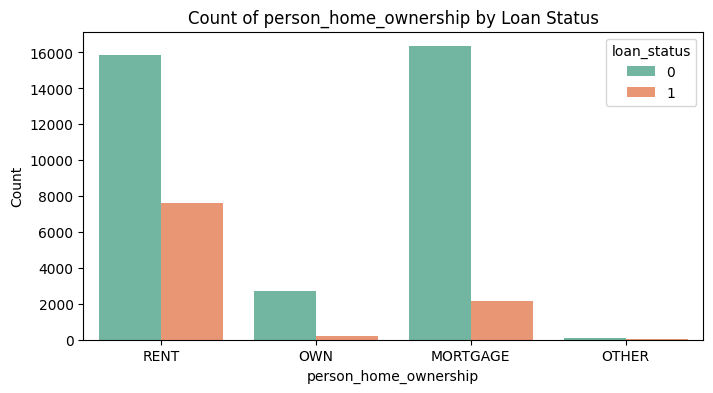

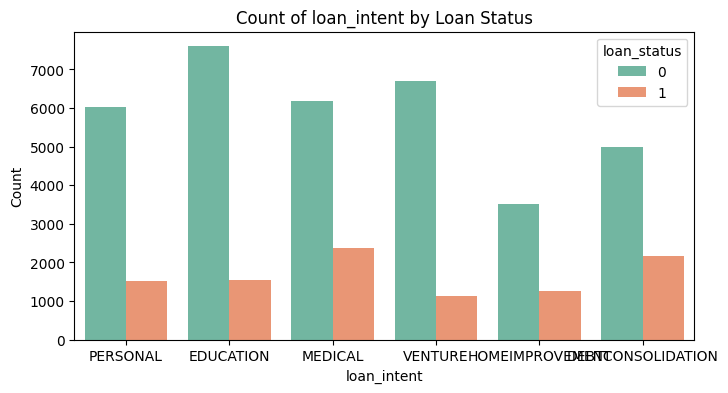

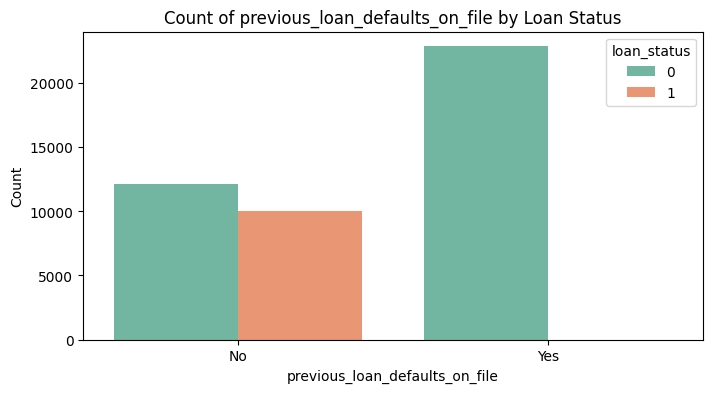

In [16]:
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership',
                       'loan_intent', 'previous_loan_defaults_on_file']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, hue="loan_status", palette="Set2")
    plt.title(f"Count of {col} by Loan Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


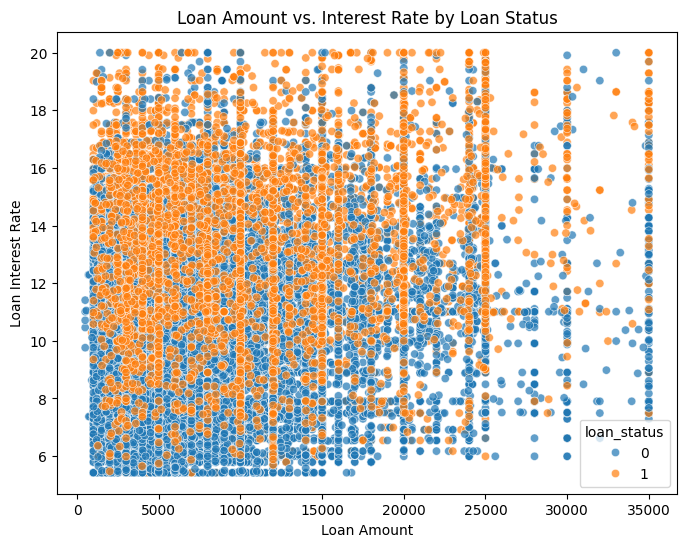

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="loan_amnt", y="loan_int_rate", hue="loan_status", alpha=0.7)
plt.title("Loan Amount vs. Interest Rate by Loan Status")
plt.xlabel("Loan Amount")
plt.ylabel("Loan Interest Rate")
plt.show()


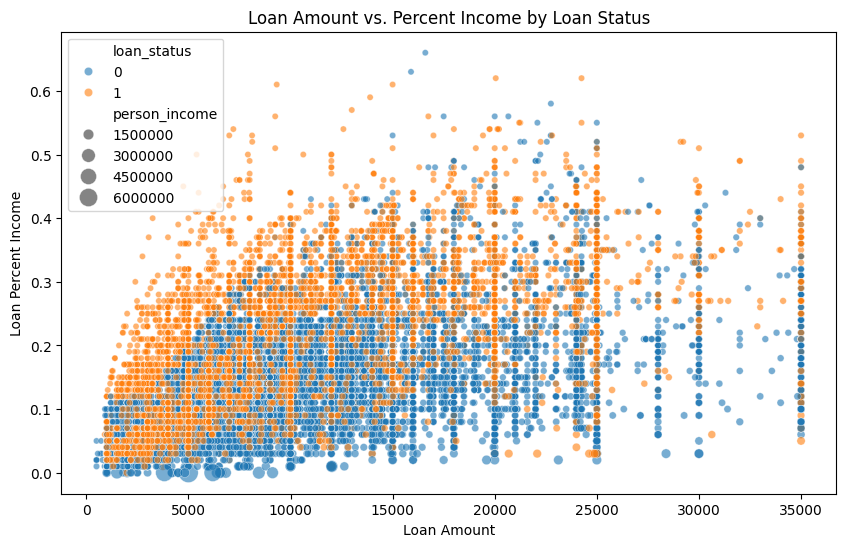

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="loan_amnt", y="loan_percent_income", hue="loan_status", size="person_income", alpha=0.6, sizes=(20, 200))
plt.title("Loan Amount vs. Percent Income by Loan Status")
plt.xlabel("Loan Amount")
plt.ylabel("Loan Percent Income")
plt.show()


Boxplots for Outliers in Numerical Columns


C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\738312504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Pastel1")


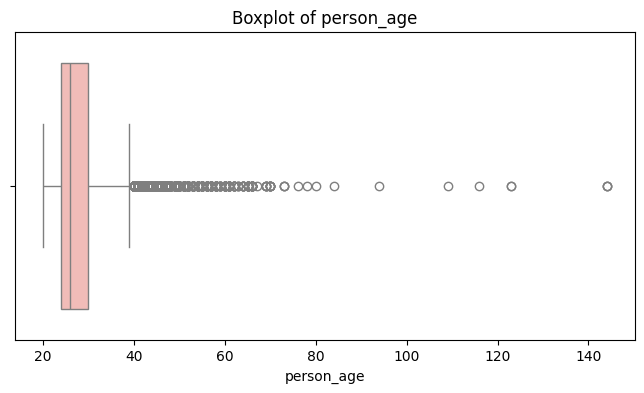

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\738312504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Pastel1")


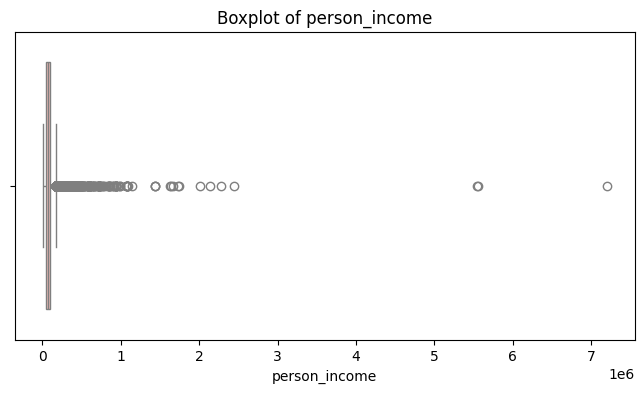

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\738312504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Pastel1")


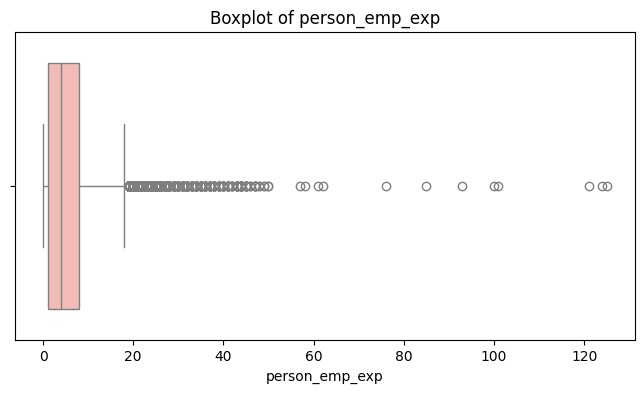

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\738312504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Pastel1")


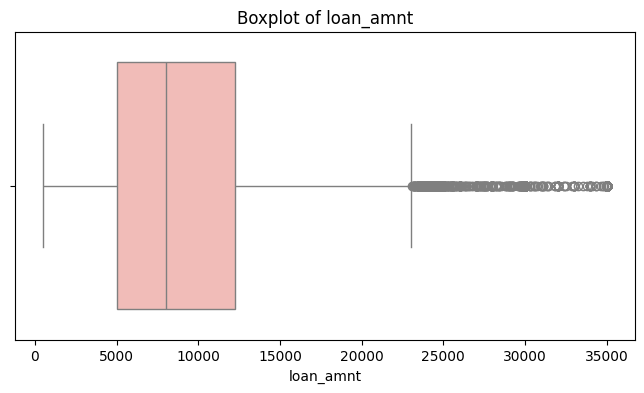

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\738312504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Pastel1")


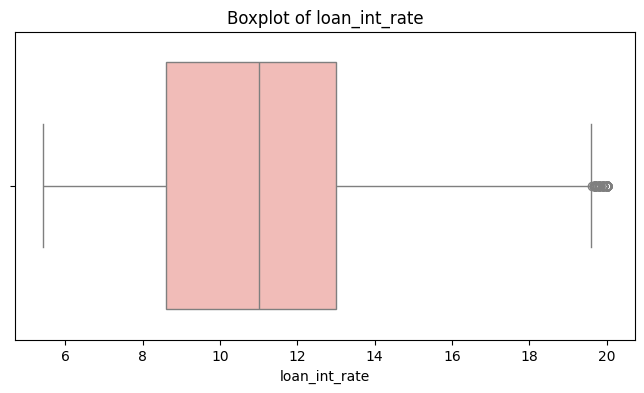

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\738312504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Pastel1")


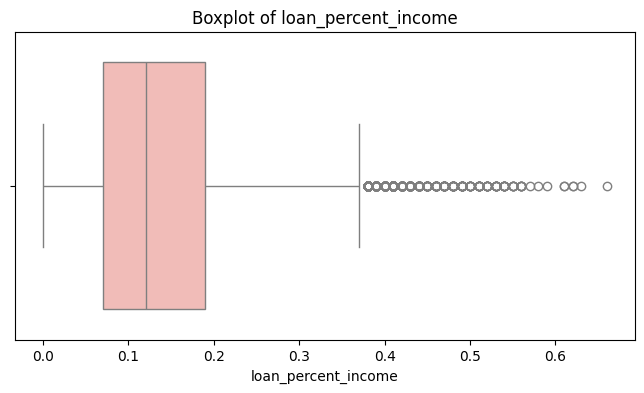

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\738312504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Pastel1")


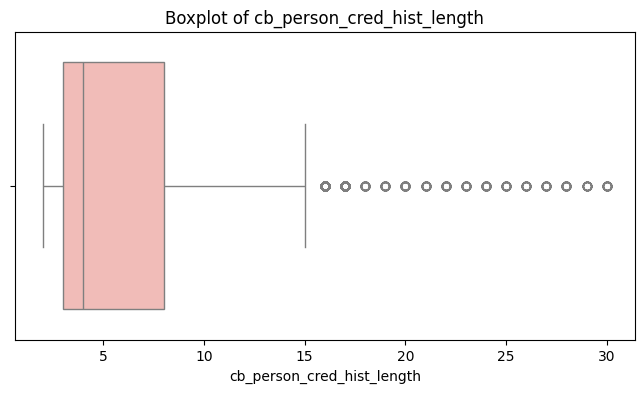

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\738312504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=col, palette="Pastel1")


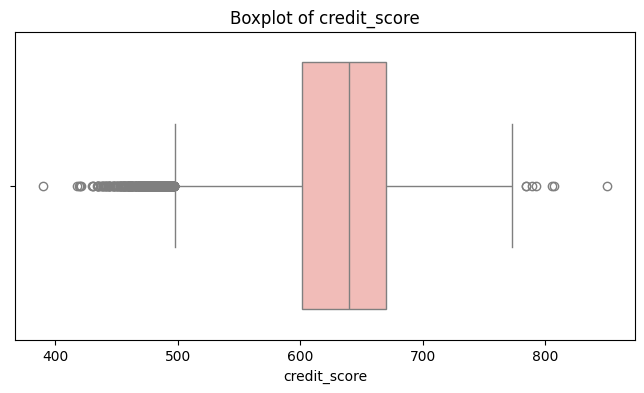

In [19]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x=col, palette="Pastel1")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()


C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\3421304943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=approval_rate, x=col, y="loan_status", palette="Blues_d", legend=False)


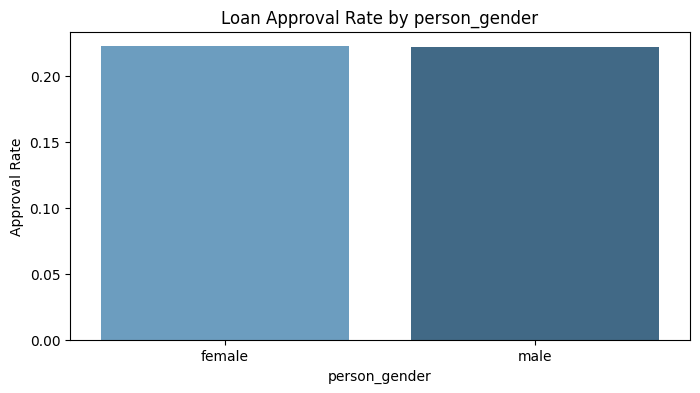

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\3421304943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=approval_rate, x=col, y="loan_status", palette="Blues_d", legend=False)


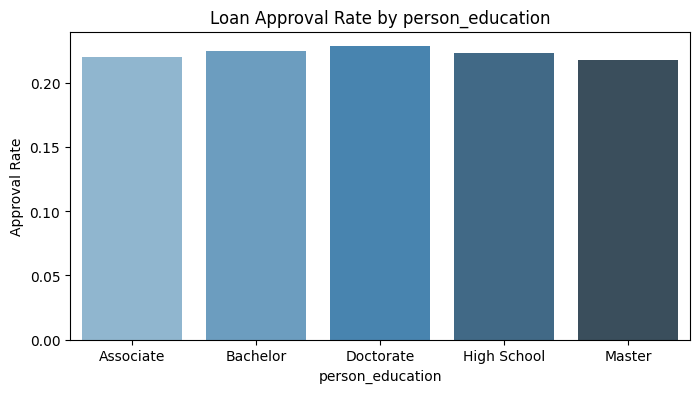

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\3421304943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=approval_rate, x=col, y="loan_status", palette="Blues_d", legend=False)


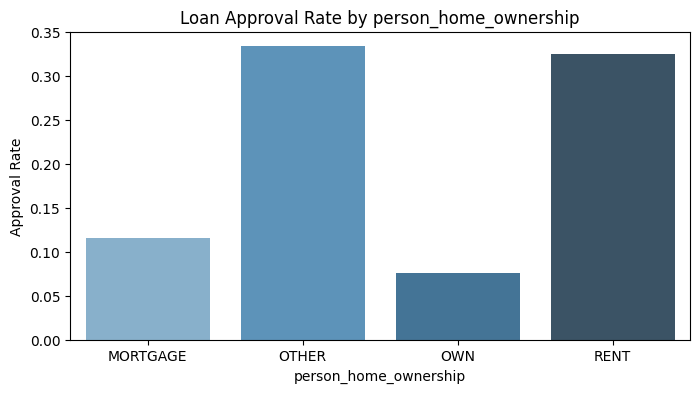

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\3421304943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=approval_rate, x=col, y="loan_status", palette="Blues_d", legend=False)


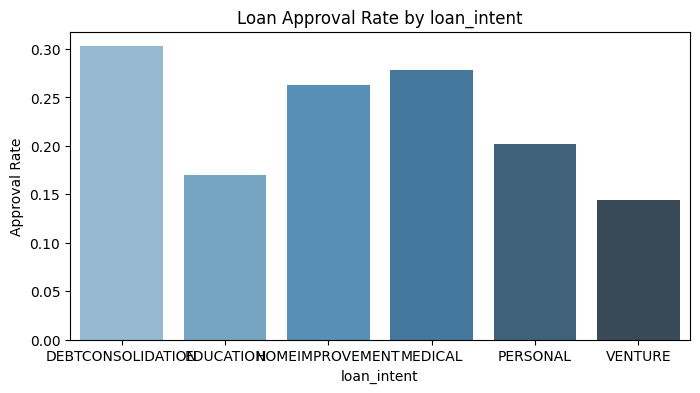

C:\Users\Ryan Ler\AppData\Local\Temp\ipykernel_11352\3421304943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=approval_rate, x=col, y="loan_status", palette="Blues_d", legend=False)


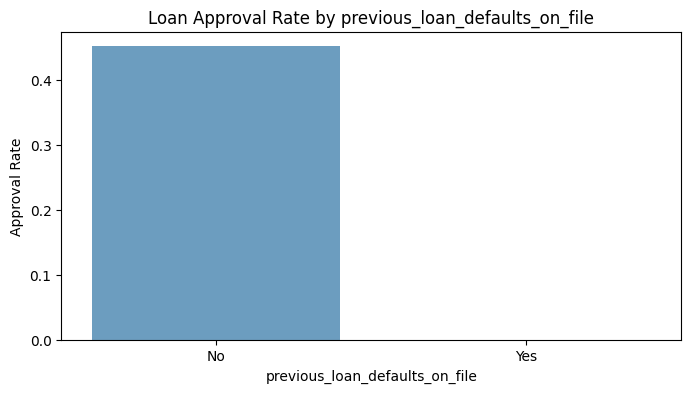

In [20]:
for col in categorical_columns:
    approval_rate = data.groupby(col)['loan_status'].mean().reset_index()
    plt.figure(figsize=(8, 4))
    sns.barplot(data=approval_rate, x=col, y="loan_status", palette="Blues_d", legend=False)
    plt.title(f"Loan Approval Rate by {col}")
    plt.xlabel(col)
    plt.ylabel("Approval Rate")
    plt.show()


In [21]:
# Separate features and target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [22]:
X.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file'],
      dtype='object')

## Base Models Without Class Balancing

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Label encoding
onehotencoder = OneHotEncoder()

for column in categorical_columns:
    # One-hot encode the column
    onehot = onehotencoder.fit_transform(data[column].values.reshape(-1, 1)).toarray()
    
    # Create DataFrame for the one-hot encoded columns
    dfOneHot = pd.DataFrame(
        onehot, 
        columns=[f"{column}_{int(i)}" for i in range(onehot.shape[1])]
    )
    
    # Concatenate the one-hot encoded columns with the original DataFrame
    data = pd.concat([data, dfOneHot], axis=1)
    
    # Drop the original column
    data = data.drop([column], axis=1)

data



person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.49                         3.0           561   
1                     0.08                         2.0           504   
2                     0.44                         3.0           635   
3                     0.44                         2.0           675   
4                     0.53                         4.0           586   
...                    ...                         ...           ...   
44995                 0.31                         3.0           645   
44996                 0.14                        11.0           621   
44997                 0.05                        10.0           668   
44998                 0.36                         6.0           604   
44999                 0.13                         3.0           628   

       loan_status  person_gender_0  ...  person_home_ownership_2  \
0                1              1.0  ...                      0.0   
1                0              1.0  ...                      1.0   
2                1              1.0  ...                      0.0   
3                1              1.0  ...                      0.0   
4                1              0.0  ...                      0.0   
...            ...              ...  ...                      ...   
44995            1              0.0  ...                      0.0   
44996            1              1.0  ...                      0.0   
44997            1              0.0  ...                      0.0   
44998            1              0.0  ...                      0.0   
44999            1              0.0  ...                      0.0   

       person_home_ownership_3  loan_intent_0  loan_intent_1  loan_intent_2  \
0                          1.0            0.0            0.0            0.0   
1                          0.0            0.0            1.0            0.0   
2                          0.0            0.0            0.0            0.0   
3                          1.0            0.0            0.0            0.0   
4                          1.0            0.0            0.0            0.0   
...                        ...            ...            ...            ...   
44995                      1.0            0.0            0.0            0.0   
44996                      1.0            0.0            0.0            1.0   
44997                      1.0            1.0            0.0            0.0   
44998                      1.0            0.0            1.0            0.0   
44999                      1.0            1.0            0.0            0.0   

       loan_intent_3  loan_intent_4  loan_intent_5  \
0                0.0            1.0            0.0   
1                0.0            0.0            0.0   
2                1.0            0.0            0.0   
3                1.0            0.0            0.0   
4                1.0            0.0            0.0   
...              ...            ...            ...   
44995            1.0            0.0            0.

In [26]:
X

person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0            22.0        71948.0               0    35000.0          16.02   
1            21.0        12282.0               0     1000.0          11.14   
2            25.0        12438.0               3     5500.0          12.87   
3            23.0        79753.0               0    35000.0          15.23   
4            24.0        66135.0               1    35000.0          14.27   
...           ...            ...             ...        ...            ...   
44995        27.0        47971.0               6    15000.0          15.66   
44996        37.0        65800.0              17     9000.0          14.07   
44997        33.0        56942.0               7     2771.0          10.02   
44998        29.0        33164.0               4    12000.0          13.23   
44999        24.0        51609.0               1     6665.0          17.05   

       loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                     0.49                         3.0           561   
1                     0.08                         2.0           504   
2                     0.44                         3.0           635   
3                     0.44                         2.0           675   
4                     0.53                         4.0           586   
...                    ...                         ...           ...   
44995                 0.31                         3.0           645   
44996                 0.14                        11.0           621   
44997                 0.05                        10.0           668   
44998                 0.36                         6.0           604   
44999                 0.13                         3.0           628   

       person_gender_0  person_gender_1  ...  person_home_ownership_2  \
0                  1.0              0.0  ...                      0.0   
1                  1.0              0.0  ...                      1.0   
2                  1.0              0.0  ...                      0.0   
3                  1.0              0.0  ...                      0.0   
4                  0.0              1.0  ...                      0.0   
...                ...              ...  ...                      ...   
44995              0.0              1.0  ...                      0.0   
44996              1.0              0.0  ...                      0.0   
44997              0.0              1.0  ...                      0.0   
44998              0.0              1.0  ...                      0.0   
44999              0.0              1.0  ...                      0.0   

       person_home_ownership_3  loan_intent_0  loan_intent_1  loan_intent_2  \
0                          1.0            0.0            0.0            0.0   
1                          0.0            0.0            1.0            0.0   
2                          0.0            0.0            0.0            0.0   
3                          1.0            0.0            0.0            0.0   
4                          1.0            0.0            0.0            0.0   
...                        ...            ...            ...            ...   
44995                      1.0            0.0            0.0            0.0   
44996                      1.0            0.0            0.0            1.0   
44997                      1.0            1.0            0.0            0.0   
44998                      1.0            0.0            1.0            0.0   
44999                      1.0            1.0            0.0            0.0   

       loan_intent_3  loan_intent_4  loan_intent_5  \
0                0.0            1.0            0.0   
1                0.0            0.0            0.0   
2                1.0            0.0            0.0   
3                1.0            0.0            0.0   
4                1.0            0.0            0.0   
...              ...            ...            ...   
4

In [27]:
# Standardize numerical columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])  # Scale only numerical columns

# Convert scaled numerical features back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_columns)

# Combine scaled numerical features with one-hot encoded features
X_final = pd.concat([X_scaled_df, data.drop(numerical_columns + ['loan_status'], axis=1)], axis=1)

# Convert X_final to a NumPy array if required for downstream tasks
X = X_final.values

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [29]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Get the accuracy score
rf_acc = accuracy_score(y_test, y_pred)*100
rf_pre = precision_score(y_test, y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1_ = f1_score(y_test, y_pred, average='micro')

print("\nRF - Accuracy: {:.3f}.".format(rf_acc))
print("RF - Precision: {:.3f}.".format(rf_pre))
print("RF - Recall: {:.3f}.".format(rf_recall))
print("RF - F1_Score: {:.3f}.".format(rf_f1_))
print ('\n Classification Report:\n', classification_report(y_test,y_pred))


RF - Accuracy: 93.011.
RF - Precision: 0.930.
RF - Recall: 0.930.
RF - F1_Score: 0.930.

 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.90      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2)})
print(df.head())

       Actual  Predicted
37979       0          0
9911        0          0
43386       1          1
13822       0          0
44810       1          1


## Class Balancing

<Axes: xlabel='loan_status', ylabel='count'>

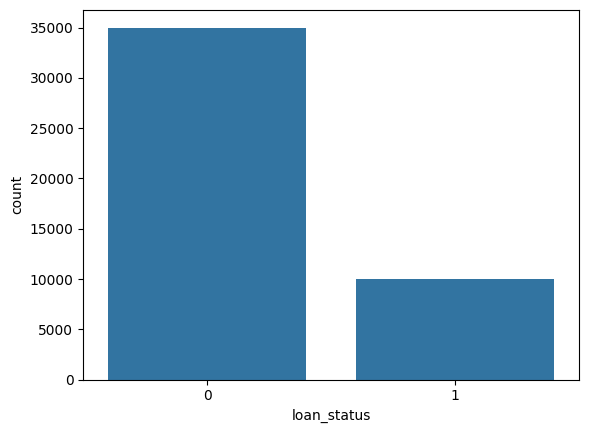

In [31]:
import seaborn as sns
data['loan_status'].value_counts()
sns.countplot(x = 'loan_status', data = data)

c:\Users\Ryan Ler\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Ryan Ler\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Ryan Ler\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Ryan Ler\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, c

<Axes: xlabel='loan_status', ylabel='count'>

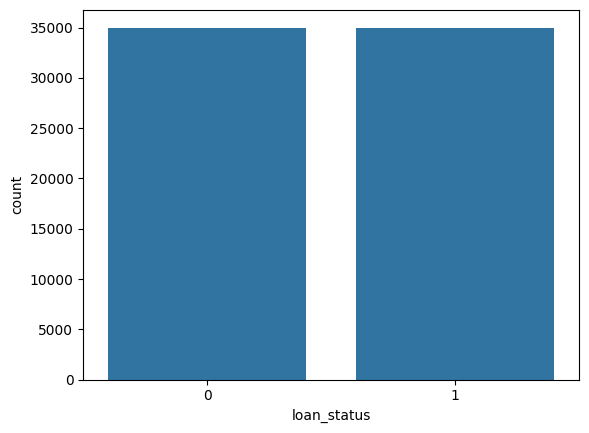

In [32]:
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(X, y)
sns.countplot(x = y_b)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.2, random_state = 42)

In [34]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Get the accuracy score
rf_acc = accuracy_score(y_test, y_pred)*100
rf_pre = precision_score(y_test, y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1_ = f1_score(y_test, y_pred, average='micro')
  
print("\nRF - Accuracy: {:.3f}.".format(rf_acc))
print("RF - Precision: {:.3f}.".format(rf_pre))
print("RF - Recall: {:.3f}.".format(rf_recall))
print("RF - F1_Score: {:.3f}.".format(rf_f1_))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))


RF - Accuracy: 94.900.
RF - Precision: 0.949.
RF - Recall: 0.949.
RF - F1_Score: 0.949.

 Clasification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      7023
           1       0.93      0.96      0.95      6977

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



## Hyperparameter Tuning

In [48]:
from numpy import arange
# The function to measure the quality of a split
criterion = ['gini', 'entropy']

# Class Weight
class_weight = ['balanced', None] 
             
# Number of trees in random forest
n_estimators = arange(200, 1000, 100)

# Number of features to consider at every split
max_features = [None, 'sqrt']

# Maximum number of levels in tree
max_depth = arange(10, 110, 10)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
parameters = {'criterion': criterion,
               'class_weight': class_weight,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(parameters)

{'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', None], 'n_estimators': array([200, 300, 400, 500, 600, 700, 800, 900]), 'max_features': [None, 'sqrt'], 'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]), 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## Randomized Search CV with Class Balancing

In [49]:
from sklearn.model_selection import RandomizedSearchCV

rf_randomized = RandomizedSearchCV(estimator = rf, param_distributions = parameters, cv = 5, verbose=2)

rf_randomized.fit(X_train, y_train)

print("\nBest Parameters: ", rf_randomized.best_params_)
print("Best Scores: ", rf_randomized.best_score_) 

y_pred = rf_randomized.predict(X_test)

# Get the accuracy score
rf_acc = accuracy_score(y_test, y_pred)*100
rf_pre = precision_score(y_test, y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1_ = f1_score(y_test, y_pred, average='micro')

print("\nRF - Accuracy: {:.3f}.".format(rf_acc))
print("RF - Precision: {:.3f}.".format(rf_pre))
print("RF - Recall: {:.3f}.".format(rf_recall))
print("RF - F1_Score: {:.3f}.".format(rf_f1_))
print ('\n Classification Report:\n', classification_report(y_test,y_pred))
print()

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2)})
print(df1.head())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  35.5s
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  40.8s
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  39.3s
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  35.5s
[CV] END bootstrap=False, class_weight=None, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=400; total time=  38.2s
[CV] END bootstrap=False, class_weight=None, criterion=gini